For two-month stints, residents from the Mayo Clinic Urology Department do a rotation at Children's Minneapolis. In order to arm residents and their families with the best tool for promoting safety––information––I am conducting analyses of criminal activity in and around the Whittier neighborhood. The location of the temporary residence is the Murals of LynLake (44.951130601589234, -93.28785887942821), which provides enough space for a small family and allows pets (with a per-pet fee). One parking spot is included; additional parking spots may be rented. As we will see, it may be prudent to avoid street parking if residents and their families are bringing more than one car.

Let's begin.

In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import statsmodels.api as sm


# Load data
df = pd.read_csv("Crime_Data.csv",low_memory=False,index_col="OBJECTID")
# Display overall data structure
display(df.head(20))

df['Offense_Category']=df['Offense_Category'].astype('category')
df['Neighborhood'] = df['Neighborhood'].astype('category')
df['Occurred_Date'] = pd.to_datetime(df['Occurred_Date'])

display(df.info())


,X,Y,Type,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,NIBRS_Group,NIBRS_Code,...,Problem_Final,Address,Precinct,Neighborhood,Ward,Latitude,Longitude,wgsXAnon,wgsYAnon,Crime_Count
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,-93.315904,44.996096,Additional Crime Metrics,19-001979,MP20191979,2019/01/03 00:09:00+00,2019/01/02 21:55:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse-In Progress (P),0016XX VINCENT AVE N,4.0,Willard - Hay,5.0,44.99610,-93.31590,-1.038788e+07,5.620907e+06,1
2,-93.310826,45.021371,Additional Crime Metrics,19-016104,MP201916104,2019/01/17 03:03:00+00,2019/01/17 02:36:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic with Weapons (P),0036XX RUSSELL AVE N,4.0,Cleveland,4.0,45.02137,-93.31083,-1.038731e+07,5.624887e+06,1
3,-93.313518,45.049415,Additional Crime Metrics,19-026241,MP201926241,2019/01/27 19:50:00+00,2019/01/27 18:17:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Stabbing (PE),0025XX 52ND AVE N,4.0,Shingle Creek,4.0,45.04941,-93.31352,-1.038761e+07,5.629304e+06,1
4,-93.306123,44.896520,Additional Crime Metrics,19-032882,MP201932882,2019/02/03 18:03:00+00,2019/02/03 17:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse-In Progress (P),0059XX NEWTON AVE S,5.0,Armatage,13.0,44.89652,-93.30612,-1.038679e+07,5.605245e+06,1
5,-93.241592,45.025836,Additional Crime Metrics,19-036236,MP201936236,2019/02/07 03:15:00+00,2019/02/06 22:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic with Weapons (P),0012XX 32ND AVE NE,2.0,Waite Park,1.0,45.02584,-93.24159,-1.037961e+07,5.625590e+06,1
6,-93.264536,44.944730,Additional Crime Metrics,19-045570,MP201945570,2019/02/16 01:49:00+00,2019/02/16 00:45:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Assault in Progress (P),0007XX 32ND ST E,3.0,Central,9.0,44.94473,-93.26454,-1.038216e+07,5.612825e+06,1
7,-93.301181,45.029455,Additional Crime Metrics,19-058764,MP201958764,2019/03/01 06:23:00+00,2019/03/01 05:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Burglary Dwlng In Progress (P),0017XX 41ST AVE N,4.0,Webber - Camden,4.0,45.02946,-93.30118,-1.038624e+07,5.626160e+06,1
8,-93.273381,44.960900,Additional Crime Metrics,19-066854,MP201966854,2019/03/09 03:02:00+00,2019/03/08 21:43:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse-In Progress (P),0002XX 22ND ST E,5.0,Whittier,10.0,44.96090,-93.27338,-1.038315e+07,5.615368e+06,1
9,-93.275367,44.950150,Additional Crime Metrics,19-081415,MP201981415,2019/03/22 14:24:00+00,2019/03/18 12:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse Report Only (P),0029XX STEVENS AVE,5.0,Whittier,10.0,44.95015,-93.27537,-1.038337e+07,5.613677e+06,1


<class 'pandas.core.frame.DataFrame'>
Index: 258765 entries, 1 to 258765
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   X                    258765 non-null  float64            
 1   Y                    258765 non-null  float64            
 2   Type                 258765 non-null  object             
 3   Case_Number          258765 non-null  object             
 4   Case_NumberAlt       223201 non-null  object             
 5   Reported_Date        258765 non-null  object             
 6   Occurred_Date        258764 non-null  datetime64[ns, UTC]
 7   NIBRS_Crime_Against  258765 non-null  object             
 8   NIBRS_Group          258765 non-null  object             
 9   NIBRS_Code           258765 non-null  object             
 10  Offense_Category     258765 non-null  category           
 11  Offense              258765 non-null  object             
 12  Problem

None

In [2]:
# Checking for missing values in crucial columns
missing_values = df.isnull().sum()
# Check for duplicates
duplicated_values = df.duplicated()
# If the Offense_Category, 
print(missing_values)
df_clean = df.dropna(axis=0,subset=['Neighborhood','Occurred_Date'])
df_clean.info()

X                          0
Y                          0
Type                       0
Case_Number                0
Case_NumberAlt         35564
Reported_Date              0
Occurred_Date              1
NIBRS_Crime_Against        0
NIBRS_Group                0
NIBRS_Code                 0
Offense_Category           0
Offense                    0
Problem_Initial        49204
Problem_Final          49204
Address                   68
Precinct                1625
Neighborhood            1704
Ward                    1844
Latitude                   0
Longitude                  0
wgsXAnon                   0
wgsYAnon                   0
Crime_Count                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 257060 entries, 1 to 258765
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   X                    257060 non-null  float64            
 1   Y                   

In [3]:
# Define haversine function
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0
    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance
# Center point coordinates: The Murals of LynLake
center_lat, center_lon = 44.951130601589234, -93.28785887942821
# calculate distance
df_hs = df_clean
df_hs['distance'] = df_hs.apply(lambda x: haversine(center_lat, center_lon, x['Latitude'], x['Longitude']), axis=1)
# Filter for crimes within a 2 km radius
df_hs = df_hs[df_hs['distance'] <= 1.6]

# Pick relevant offenses and plot
offense_type = ["Burglary/Breaking & Entering","Larceny/Theft Offenses","Destruction/Damage/Vandalism of Property", "Drug/Narcotic Offenses","Motor Vehicle Theft","Robbery","Shots Fired Calls","Assault Offenses", "Homicide Offenses"]
offense_type_fix = [offense.replace(" Offenses", "") for offense in offense_type]
offense_type_fix =  [offense.replace("Destruction/Damage/Vandalism of Property", "Destruction of Property") for offense in offense_type_fix]

# df_radius["Offense_Category"] = df_radius["Offense_Category"].str.strip()
# df_radius_filt = df_radius.loc[df_radius["Offense_Category"].isin(offense_type)]
# df_radius_filt['Offense_Category'] = df_radius_filt['Offense_Category'].str.replace(' Offenses','').str.strip()
# df_radius_filt['Offense_Category'] = pd.Categorical(df_radius_filt['Offense_Category'], categories=offense_type_fix, ordered=True)

df_hs["Offense_Category"] = df_hs["Offense_Category"].str.strip()
df_hs_filt = df_hs.loc[df_hs["Offense_Category"].isin(offense_type)]
# Fix "Offenses" text
df_hs_filt['Offense_Category'] = df_hs_filt['Offense_Category'].apply(lambda x: x.replace(' Offenses',''))
# Fix length description
df_hs_filt['Offense_Category'] = df_hs_filt['Offense_Category'].apply(lambda x: x.replace("Destruction/Damage/Vandalism of Property","Destruction of Property"))
df_hs_filt['Offense_Category'] = pd.Categorical(df_hs_filt['Offense_Category'], categories=offense_type_fix,ordered=True)

# Display the result
# display(df_radius.info())
display(df_hs_filt.info())
print(offense_type_fix)

<class 'pandas.core.frame.DataFrame'>
Index: 28995 entries, 146 to 258758
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   X                    28995 non-null  float64            
 1   Y                    28995 non-null  float64            
 2   Type                 28995 non-null  object             
 3   Case_Number          28995 non-null  object             
 4   Case_NumberAlt       26733 non-null  object             
 5   Reported_Date        28995 non-null  object             
 6   Occurred_Date        28995 non-null  datetime64[ns, UTC]
 7   NIBRS_Crime_Against  28995 non-null  object             
 8   NIBRS_Group          28995 non-null  object             
 9   NIBRS_Code           28995 non-null  object             
 10  Offense_Category     28995 non-null  category           
 11  Offense              28995 non-null  object             
 12  Problem_Initial     

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_14905/3842408790.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hs['distance'] = df_hs.apply(lambda x: haversine(center_lat, center_lon, x['Latitude'], x['Longitude']), axis=1)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_14905/3842408790.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hs["Offense_Category"] = df_hs["Offense_Category"].str.strip()
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_14905/3842408

None

['Burglary/Breaking & Entering', 'Larceny/Theft', 'Destruction of Property', 'Drug/Narcotic', 'Motor Vehicle Theft', 'Robbery', 'Shots Fired Calls', 'Assault', 'Homicide']


(0.0, 10574.3)

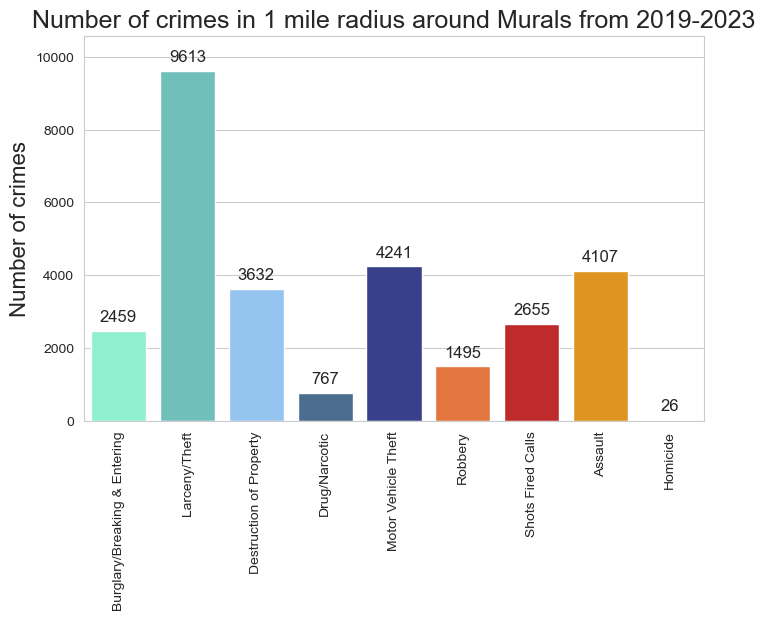

In [4]:
# define custom color palette
custom_colors = ["#7FFFD4","#64CCC5","#87C4FF","#3E6D9C","#2B3499","#FF6C22","#D71313","#ff9a00","#111111"]
# countplot for overall crimes
fs_axis = 16
plt.close()
fig = plt.subplots(figsize=(8,5))
sns.set_context('notebook')
sns.set_style('white')
ax = sns.countplot(data=df_hs_filt,x="Offense_Category",palette=custom_colors)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel(None)
ax.set_ylabel("Number of crimes",fontsize=fs_axis)
ax.set_title("Number of crimes in 1 mile radius around Murals from 2019-2023",fontsize=fs_axis+2)
max_height = 0 # initialize variable
for p in ax.patches:
    height = p.get_height()  # Get the current bar's height
    ax.annotate(format(height, '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
    # update max height if current height > max_height
    if max_height < height:
        max_height = height

ax.set_ylim(top = max_height + max_height*.1)


How have crime numbers fluctuated over the last few years? Is the area becoming safer, less safe, or staying about the same?

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_14905/203016732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hs_filt['Occurred_Date'] = pd.to_datetime(df_hs_filt['Occurred_Date'])
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_14905/203016732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hs_filt['Year'] = df_hs_filt['Occurred_Date'].dt.year


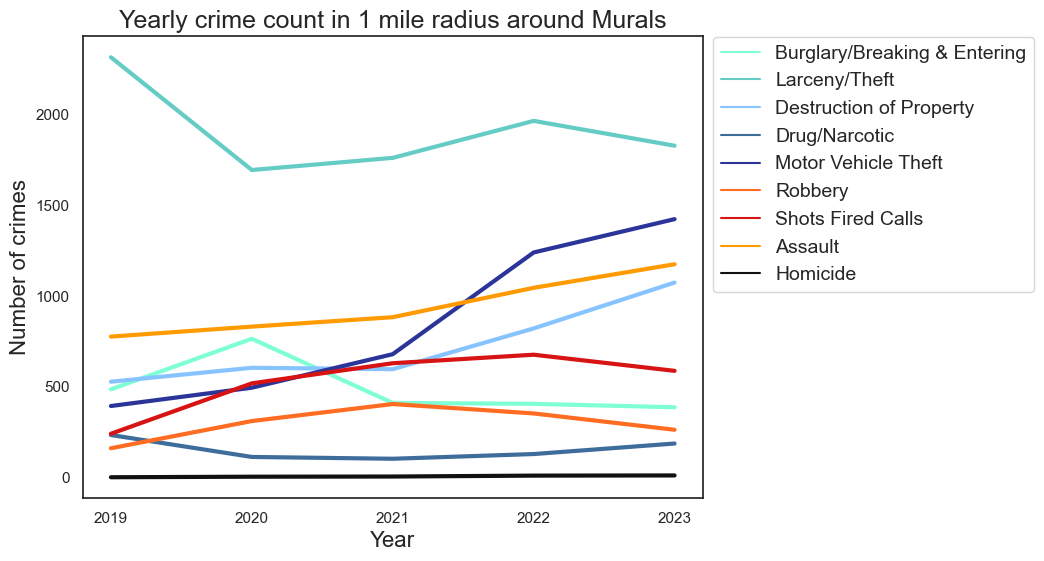

In [5]:
# Convert 'Occurred_Date' to datetime
df_hs_filt['Occurred_Date'] = pd.to_datetime(df_hs_filt['Occurred_Date'])
# Extract the year from 'Occurred_Date'
df_hs_filt['Year'] = df_hs_filt['Occurred_Date'].dt.year
# Filter the DataFrame to include only the years 2019 to 2023
df_hs_filt = df_hs_filt[df_hs_filt['Year'].isin(range(2019, 2024))]
# Group by 'Year' and 'Offense_Category' and sum the 'Crime_Count'
yearly_sum = df_hs_filt.groupby(['Year', 'Offense_Category'])['Crime_Count'].sum().reset_index()

fig, ax = plt.subplots(figsize = (8,6))

sns.lineplot(data=yearly_sum, x='Year', y='Crime_Count', hue='Offense_Category',linewidth=3,palette=custom_colors)

# Set x-ticks to only whole years
ax.set_xticks(range(2019, 2024))

# Set title and labels
fs_axis = 16
ax.set_title("Yearly crime count in 1 mile radius around Murals",fontsize=fs_axis+2)
ax.set_xlabel("Year",fontsize=fs_axis)
ax.set_ylabel("Number of crimes",fontsize=fs_axis)
# Adjust legen
plt.legend(loc="upper right",fontsize=fs_axis)
sns.move_legend(ax,"upper right",bbox_to_anchor=(1.55,1.02),fontsize=fs_axis-2)
plt.show()


In [6]:
offense_types_to_analyze = ["Larceny/Theft","Burglary/Breaking & Entering","Robbery","Motor Vehicle Theft","Assault","Homicide"]

correlation_dict = {}

# Loop through each category and perform regression
for category in offense_types_to_analyze:
    # Filter data for the current category
    category_data = yearly_sum[yearly_sum['Offense_Category'] == category]
    aggregated_data = category_data.groupby('Year')['Crime_Count'].sum().reset_index()
    # Calculate the Pearson correlation coefficient
    correlation_crimevsyear = aggregated_data['Year'].corr(aggregated_data['Crime_Count'])
    correlation_dict[category]=correlation_crimevsyear
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Offense_Category', 'Correlation'])
correlation_df
#     # The dependent variable
#     Y = aggregated_data['Crime_Count']
# 
#     # The independent variable, add a constant to the model for the intercept
#     X = sm.add_constant(aggregated_data['Year'])
# 
#     # Fit the model
#     model = sm.OLS(Y, X).fit()
# 
#     # Store the model summary
#     model_summaries[category] = model.summary()
# 
# # Now you can print or analyze the summaries for each category
# for category, summary in model_summaries.items():
#     print(f"Category: {category}\n")
#     print(summary)
#     print("\n")



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Offense_Category,Correlation
0,Larceny/Theft,-0.451883
1,Burglary/Breaking & Entering,-0.558280
2,Robbery,0.418000
3,Motor Vehicle Theft,0.965227
4,Assault,0.972645
5,Homicide,0.977140


Correlation analysis indicates that motor vehicle theft, assault, and homicide have all been increasing steadily in the last few years, although the numbers of homicide are  low (26 from 2019 to 2023). As such, the focus of the remainder of our analysis will be on the Larceny, Burglary, Robbery, Motor Vehicle Theft, and Assault. Robbery has been weakly increasing and Theft and Burglary are trending downwards. 

What about how things looked in the last 12 months from November 2022 through October 2023

In [ ]:
# Extract month and time info from data. Do seasonal fluctuations in crime matter for this area?
start_date = "2022-11-01"
end_date = "2023-10-31"

df_hs_filt['Month'] = df_hs_filt['Occurred_Date'].dt.month
df_hs_filt['Hour'] = df_hs_filt['Occurred_Date'].dt.hour
df_hs_filt['Occurred_Date'] = pd.to_datetime(df_hs_filt['Occurred_Date'], format='%Y/%m/%d %H:%M:%S+%f', errors='coerce')

# Create a dictionary mapping month numbers to names
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Map the month numbers to names
df_hs_filt['Month_Name'] = df_hs_filt['Month'].map(month_names)

# Month-year column
df_hs_filt['Month_Year'] = df_hs_filt['Month_Name'] + '-' + df_hs_filt['Year'].astype(str)
# Define the correct order for the months
months_order = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct']

# Create a categorical column with the specified order
df_hs_filt['Month_Name_Ordered'] = pd.Categorical(df_hs_filt['Month_Name'], categories=months_order, ordered=True)
# Sort the DataFrame by the Month_Name_Ordered col 
df_hs_filt.sort_values('Month_Name_Ordered', inplace=True)


df_hs_2023 = df_hs_filt[(df_hs_filt['Occurred_Date'] > start_date) & (df_hs_filt['Occurred_Date'] < end_date)]

# Sort the DataFrame first by year, then by month

# Subset for offenses of interest
df_hs_2023_subset = df_hs_2023[df_hs_filt['Offense_Category'].isin(offense_types_to_analyze)].sort_values(by='Occurred_Date')

monthly_sum_2023 = df_hs_2023_subset.groupby(['Month_Year','Offense_Category'])['Crime_Count'].sum().reset_index()
fig1,ax1 = plt.subplots(figsize=(8,5))
sns.lineplot(data=monthly_sum_2023,x='Month_Year',y='Crime_Count',hue="Offense_Category",ax=ax1,order=months_order)

fig2 = plt.subplots(figsize=(8,5))

ax=plt.hist(data=df_hs_2023_subset,x='Hour',hue="Offense_Category",element="step",
             stat="count", common_norm=False)
# plt.legend(bbox_to_anchor=(1,1))

In [ ]:
df_hs_2023_subset

In [ ]:
df_hs_filt['Month'].dtype